In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [176]:
with open('full_list_final.pickle', 'rb') as infile:
    final=pickle.load(infile)

infile.close()

In [177]:
df = pd.DataFrame.from_dict(final)

In [178]:
df = df[['title', 'genres', 'user', 'ratings']]

In [186]:
len(df['title'].unique())

4662

In [137]:
df['ratings'] = df['ratings'].replace('', value = 0)

In [138]:
df['ratings'] = df['ratings'].astype('float64')

In [139]:
# RUN THIS ONLY ONCE!!
df.ratings = df.ratings*2

In [155]:
df['ratings'] = df['ratings'].astype('int64')

In [156]:
num_of_ratings = df.groupby('title').count()[['ratings']].sort_values(by='ratings', ascending=False)

In [157]:
num_of_ratings.head()

,ratings
title,
Death Note,250
Iga no Kabamaru,215
Legend of the Galactic Heroes,215
Hajime no Ippo: Rising,214
Kara no Kyoukai Movie 7: Satsujin Kousatsu (Part 2),213


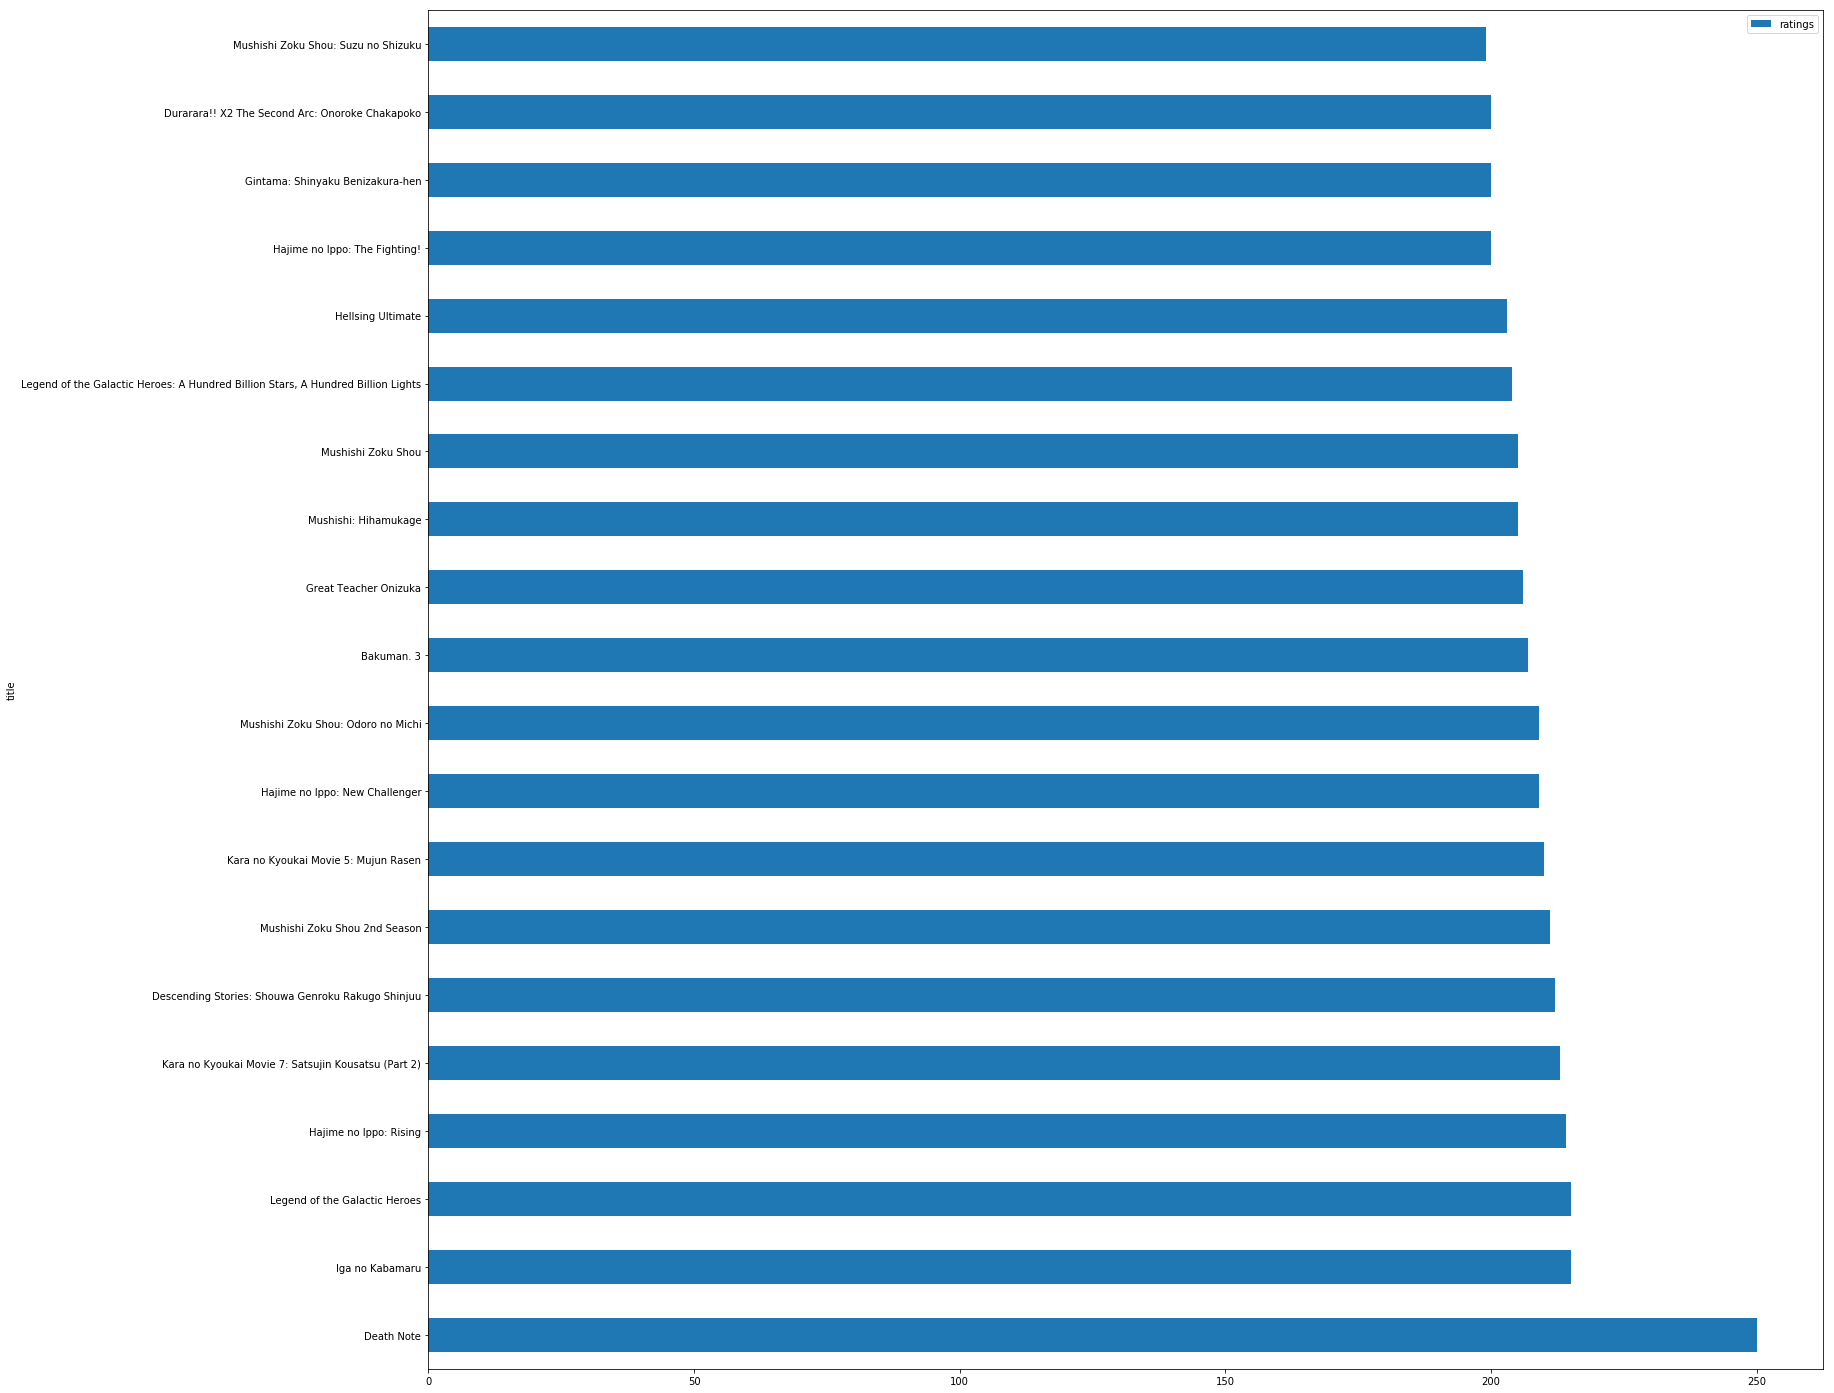

In [172]:
num_of_ratings[:20].plot.barh(figsize=(25,25))
plt.show()

### Include users who only reviewed more than 5 Animes

In [159]:
df1 = df.groupby('user').filter(lambda x: len(x) > 5)

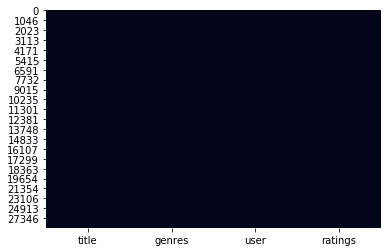

In [160]:
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

In [161]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18986 entries, 0 to 29581
Data columns (total 4 columns):
title      18986 non-null object
genres     18986 non-null object
user       18986 non-null object
ratings    18986 non-null int64
dtypes: int64(1), object(3)
memory usage: 741.6+ KB


In [162]:
df1['User_ID'] = df1.groupby('user').grouper.group_info[0]

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
df1['Title_ID'] = df1.groupby('title').grouper.group_info[0]

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
df1[df1.user == '004'].head()

,title,genres,user,ratings,User_ID,Title_ID
2,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",004,10,2,45
1253,Hunter x Hunter (2011),"[Action, Adventure, Drama, Fantasy]",004,7,2,71
2084,Steins;Gate,"[Sci Fi, Conspiracy, LGBT Themes, Psychological]",004,10,2,150
2274,Code Geass: Lelouch of the Rebellion R2,"[Mecha, Sci Fi, Conspiracy, Mind Games]",004,8,2,21
4818,Spirited Away,"[Adventure, Fantasy, Curse, Family Friendly]",004,7,2,149


### Drop Users For Confidentiallity 

In [165]:
df2 = df1.drop(columns=['user'])

In [166]:
df2.head()

,title,genres,ratings,User_ID,Title_ID
0,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",8,0,45
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",0,1,45
2,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",10,2,45
3,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",10,3,45
4,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",10,4,45


In [167]:
df2.describe()

,ratings,User_ID,Title_ID
count,18986.000000,18986.000000,18986.000000
mean,5.961129,572.845886,82.664016
std,4.119209,374.058526,49.752691
min,0.000000,0.000000,0.000000
25%,0.000000,256.000000,40.000000
50%,8.000000,511.000000,80.000000
75%,9.000000,893.000000,124.000000
max,10.000000,1303.000000,170.000000


In [168]:
df2[df2.Title_ID == 142].head()

,title,genres,ratings,User_ID,Title_ID
27684,Re:ZERO -Starting Life in Another World- Memor...,"[Comedy, Chibi, Comedy, Chibi]",6,18,142
27685,Re:ZERO -Starting Life in Another World- Memor...,"[Comedy, Chibi, Comedy, Chibi]",9,265,142
27687,Re:ZERO -Starting Life in Another World- Memor...,"[Comedy, Chibi, Comedy, Chibi]",0,780,142
27688,Re:ZERO -Starting Life in Another World- Memor...,"[Comedy, Chibi, Comedy, Chibi]",0,803,142
27690,Re:ZERO -Starting Life in Another World- Memor...,"[Comedy, Chibi, Comedy, Chibi]",0,835,142


### Final DataFrame to CSV For Model

In [169]:
df2.to_csv('anime_data.csv')